In [2]:
import json
import random
import cv2
import matplotlib.pyplot as plt
from glob import glob
import os
import sys
import numpy as np
from PIL import Image
from tqdm.notebook import tqdm

In [3]:
def get_file_paths(json_file, image_nums):
    file_path = list()
    for image_num in image_nums:
        path = json_file['images'][image_num]['file_name']
        file_path.append(path)
    return file_path

def get_file_path(json_file, image_num):
    file_path = json_file['images'][image_num]['file_name']
    return file_path

def get_annotations(json_file, image_num):
    anns = [ann for ann in json_file['annotations'] if ann['image_id'] == image_num]
    return anns

def read_image(dataset_path, file_path):
    image = cv2.imread(dataset_path + file_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def plot_bbox(image, anns):
    for ann in anns:
        xmin, ymin, w, h = map(int, ann['bbox'])
        image = cv2.rectangle(image, (xmin,ymin), (xmin+w, ymin+h), (0,0,255), 3)
    plt.imshow(image)

def get_img_stats(img_dir, img_ids):
    """
    데이터셋에 있는 이미지들의 크기와 RGB 평균 및 표준편차를 수집하는 함수입니다.
    
    Args:
        img_dir: 학습 데이터셋 이미지 폴더 경로 
        img_ids: 학습 데이터셋 하위폴더 이름들

    Returns:
        img_info: 이미지들의 정보 (크기, 평균, 표준편차)
    """
    img_info = dict(means=[], stds=[])
    for img_id in tqdm(img_ids):
        for path in glob(os.path.join(img_dir, img_id)):
            img = np.array(Image.open(path))
            img_info['means'].append(img.mean(axis=(0,1)))
            img_info['stds'].append(img.std(axis=(0,1)))
    return img_info

def get_categories(json_file, image_nums):
    cat_info = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0,7:0, 8:0, 9:0}
    for image_num in image_nums:
        anns = get_annotations(json_file, image_num)
        # print(anns)
        for ann in anns:
            cat_info[ann['category_id']] += 1
    return cat_info
        

In [4]:
with open('./dataset/train.json','r') as f:
    train_json = json.load(f)

dataset_path = './dataset/'

img_id = [id for id in range(0,4883)]
file_path = get_file_paths(train_json, img_id)
img_info = get_img_stats(dataset_path, file_path)

print(f'RGB Mean: {np.mean(img_info["means"], axis=0) / 255.}')
print(f'RGB Standard Deviation: {np.mean(img_info["stds"], axis=0) / 255.}')

  0%|          | 0/4883 [00:00<?, ?it/s]

RGB Mean: [0.48490459 0.46038158 0.43166834]
RGB Standard Deviation: [0.21190031 0.20929289 0.21483885]


In [5]:
img_id = [id for id in range(0,4883)]
category_info = get_categories(train_json, img_id)

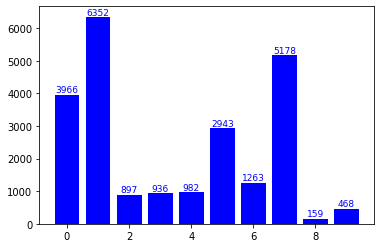

{0: 3966, 1: 6352, 2: 897, 3: 936, 4: 982, 5: 2943, 6: 1263, 7: 5178, 8: 159, 9: 468}


In [6]:
plt.bar(list(category_info.keys()), category_info.values(), color='blue')
for i, v in enumerate(category_info):
    plt.text(v, category_info[i], category_info[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
plt.show()
print(category_info)

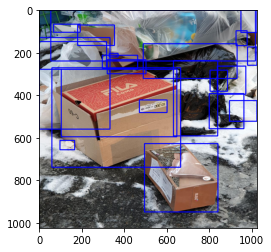

In [7]:
image_num = 5 #random.randint(0, len(train_json['images']) - 1)
file_path = get_file_path(train_json, image_num)
anns = get_annotations(train_json, image_num)
image = read_image(dataset_path, file_path)
plot_bbox(image, anns)